In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from tensorflow.keras.datasets import cifar10

In [3]:
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 43s 0us/step


In [4]:
x_train.shape

(50000, 32, 32, 3)

In [5]:
x_train[0].shape

(32, 32, 3)

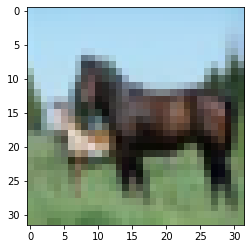

In [7]:
plt.imshow(x_train[12])

In [8]:
x_train[0].max()

255

In [9]:
x_train = x_train/255

In [10]:
x_test = x_test/255

In [11]:
x_test.shape

(10000, 32, 32, 3)

In [13]:
from tensorflow.keras.utils import to_categorical

In [14]:
y_cat_train = to_categorical(y_train,10)

In [15]:
y_cat_test = to_categorical(y_test,10)

In [17]:
y_train[0]

array([6], dtype=uint8)

In [18]:
y_cat_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten

In [20]:
28 * 28

784

In [21]:
32 * 32 * 3

3072

In [23]:
model = Sequential()
# Convolutional layer
model.add(Conv2D(filters = 32, kernel_size=(4,4),input_shape=(32,32,3),activation="relu"))
# Pooling layer
model.add(MaxPool2D(pool_size=(2,2)))

# Convolutional layer
model.add(Conv2D(filters = 32, kernel_size=(4,4),input_shape=(32,32,3),activation="relu"))
# Pooling layer
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(256,activation="relu"))

model.add(Dense(10,activation="softmax"))

model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=['accuracy'])

In [24]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 29, 29, 32)        1568      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        16416     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               205056    
_________________________________________________________________
dense_1 (Dense)              (None, 10)               

In [25]:
from tensorflow.keras.callbacks import EarlyStopping

In [27]:
early_stop = EarlyStopping(monitor="val_loss",patience=2)

In [28]:
model.fit(x_train,y_cat_train,epochs=15,
         validation_data=(x_test,y_cat_test),callbacks=[early_stop])

Train on 50000 samples, validate on 10000 samples
Epoch 1/15
50000/50000 [==============================] - 27s 542us/sample - loss: 1.4895 - accuracy: 0.4595 - val_loss: 1.2382 - val_accuracy: 0.5588
Epoch 2/15
50000/50000 [==============================] - 26s 526us/sample - loss: 1.1693 - accuracy: 0.5894 - val_loss: 1.1408 - val_accuracy: 0.6014
Epoch 3/15
50000/50000 [==============================] - 26s 529us/sample - loss: 1.0205 - accuracy: 0.6434 - val_loss: 1.0657 - val_accuracy: 0.6243
Epoch 4/15
50000/50000 [==============================] - 26s 530us/sample - loss: 0.9086 - accuracy: 0.6855 - val_loss: 0.9758 - val_accuracy: 0.6593
Epoch 5/15
50000/50000 [==============================] - 27s 542us/sample - loss: 0.8201 - accuracy: 0.7149 - val_loss: 1.0036 - val_accuracy: 0.6602
Epoch 6/15
50000/50000 [==============================] - 25s 495us/sample - loss: 0.7397 - accuracy: 0.7419 - val_loss: 0.9715 - val_accuracy: 0.6780
Epoch 7/15
50000/50000 [====================